In [8]:
import pandas as pd
from matplotlib import pyplot as plt
from graphdriver.commons import results
from graphdriver.commons.res_analysis import boxplot, latex, scores

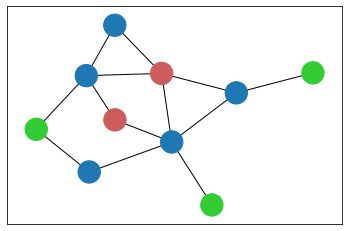

In [518]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'J'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G'), 
     ('C', 'I'), ('G', 'I'),
     ('B', 'J'), ('G', 'J'),
     ])

green = "limegreen"
red = "indianred"
blue = "tab:blue"

val_map = {'A': red,
           'G': red,
           'D': green,
           'E': green,
           'H': green}

values = [val_map.get(node, blue) for node in G.nodes()]


pos = nx.spring_layout(G, seed=50)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_color = values, node_size = 500)
# nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrows=False)
plt.show()

In [444]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'J'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G'), 
     ('C', 'I'), ('G', 'I'),
     ('B', 'J'), ('G', 'J'),
     ])

green = "limegreen"
red = "indianred"
blue = "tab:blue"

val_map = {'A': red,
           'G': red,
           'D': green,
           'E': green,
           'H': green}

values = [val_map.get(node, blue) for node in G.nodes()]


pos = nx.spring_layout(G, seed=50)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_color = values, node_size = 500)
# nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrows=False)
plt.show()

,mean,std
blca,0.932939,0.011977
brca,0.889414,0.011491
cesc,0.949850,0.005682
coad,0.917279,0.011296
esca,0.894940,0.012113
hnsc,0.922419,0.015125
kirp,0.908608,0.006248
lihc,0.945225,0.011563
lusc,0.886693,0.015361
prad,0.908854,0.011328


In [98]:
# relative ranking
pred_rounds, true_rounds = ra.get_pred(cancer)
num_drivers = []
means_t, means_f = [],[]
for r in range(len(pred_rounds)):
    _values, indices = torch.sort(pred_rounds[r], descending=True)
    ind_t = torch.where(true_rounds[r][indices] == 1)[0]
    ind_f = torch.where(true_rounds[r][indices] == 0)[0]
    means_f.extend(ind_f.numpy())
    means_t.extend(ind_t.numpy())
print(ra.describe(means_f))
# means_f = np.mean(means_f)
# means_t = np.mean(means_t)
# pd.DataFrame([means_f, means_t])



#     ra.split_pred()
#     pred_k = pred_rounds[r][indices]
#     true_k = true_rounds[r][indices]
#     num_drivers.append(true_k.sum().item())
# num_drivers

DescribeResult(nobs=26460, minmax=(4, 2702), mean=1375.5161375661376, variance=590693.7758837923, skewness=-0.010271042265316497, kurtosis=-1.1934370658127391)


In [2]:
latex.scors()


AttributeError: 'Result' object has no attribute 'test_pred'

In [312]:
np.mean(ra.top_k_drivers("thca", k=0.1))

0.7954545454545454

In [259]:
ra.top_k_drivers("blca", k=0.1)

[0.8235294117647058,
 0.8235294117647058,
 0.8431372549019608,
 0.8235294117647058,
 0.8431372549019608,
 0.8627450980392157,
 0.803921568627451,
 0.8235294117647058,
 0.8431372549019608,
 0.9019607843137255]

In [304]:
from graphdriver.commons import results
from graphdriver.utils import paths
import torch

m = results.load_results(cancer="thca", network_type=["genes", "ppi"], directed=True)
true_rounds = []
pred_rounds = []
for ran_round in m.results:
    trues = []
    preds = []
    for r in ran_round:
        true_rounds.append(m.y[r.test_mask])
        pred_rounds.append(r.test_pred)


In [306]:
# fold_std = []
ratio_drivers = []
k = int(pred_rounds[0].shape[0] * 0.1)
for pred,y in zip(pred_rounds,true_rounds):
    _values, indices = torch.sort(pred, descending=True)
    y_k = y[indices][:k]
    true_total = y[indices].sum().item()
    mean = y_k.sum().item() / true_total

    ratio_drivers.append(mean)



In [404]:
from graphdriver.commons.res_analysis import latex
rel=latex.ranking()

In [15]:
from graphdriver.commons import results, setup
import numpy as np
res = {}
for c in setup.cancer_types():
    nt_res = {}
    for nt in [["genes"], ["genes", "normal"]]:
        score, std = results.load_results(cancer=c, network_type=nt).score_test_pr_auc()
        nt_res['_'.join(nt)] = score
    res[c] = nt_res
res

{'blca': {'genes': 0.44688874458818206, 'genes_normal': 0.44205456095353507},
 'brca': {'genes': 0.20015966861845688, 'genes_normal': 0.2579317417753765},
 'cesc': {'genes': 0.1913175822191284, 'genes_normal': 0.20642662063676936},
 'coad': {'genes': 0.20917507386901427, 'genes_normal': 0.18753547654318556},
 'esca': {'genes': 0.07835001196922649, 'genes_normal': 0.12671686987920694},
 'hnsc': {'genes': 0.22208952772980015, 'genes_normal': 0.16499773788780864},
 'lihc': {'genes': 0.20007714776443136, 'genes_normal': 0.3288413827133706},
 'luad': {'genes': 0.2751736077676882, 'genes_normal': 0.2432004556949515},
 'lusc': {'genes': 0.15569374308487716, 'genes_normal': 0.3038331535370988},
 'prad': {'genes': 0.11530481161416314, 'genes_normal': 0.17368696945727408},
 'stad': {'genes': 0.1531699056367301, 'genes_normal': 0.3260909138790443},
 'thca': {'genes': 0.10803195510080774, 'genes_normal': 0.10511239234345116},
 'ucec': {'genes': 0.2616986019479756, 'genes_normal': 0.259795058387358

In [17]:
from graphdriver.commons import results, setup
import numpy as np
avg_g = []
avg_gn = []
for c in setup.cancer_types():
    score, std = results.load_results(cancer=c, network_type=["genes"]).score_test_pr_auc()
    avg_g.append(score)
    score, std = results.load_results(cancer=c, network_type=["genes", 'normal']).score_test_pr_auc()
    avg_gn.append(score)
sum(avg_g) / len(avg_g), sum(avg_gn) / len(avg_gn)

(0.20131772168542164, 0.2404787179760331)

{'cancer': 'brca',
 'directed': False,
 'gcnk': 2,
 'network_type': ['genes', 'ppi'],
 'outer_fold': 0,
 'lr': 0.016290615011353822,
 'sgd_momentum': 0.9,
 'optimizer': 'Adam',
 'conv_layer': 'GraphConv',
 'num_genes_layers': 2,
 'num_genes_nodes': 16,
 'num_linear_layers': 4,
 'num_linear_nodes': 64,
 'num_ppi_layers': 1,
 'num_ppi_nodes': 16,
 'dropout': 0.5690794055990201,
 'inner_folds': 5,
 'epochs': 56}

In [168]:
import ConfigSpace as CS
import ConfigSpace.hyperparameters as CSH

cs = CS.ConfigurationSpace()
epochs = CS.UniformIntegerHyperparameter("NUM_LINEAR_NODES", lower=8, upper=64, default_value=16, q=8)
cs.add_hyperparameters([epochs])


[NUM_LINEAR_NODES, Type: UniformInteger, Range: [16, 128], Default: 64, Q: 16]

In [169]:
for i in range(0,1000, 5):
    print(cs.sample_configuration())

Configuration(values={
  'NUM_LINEAR_NODES': 80,
})

Configuration(values={
  'NUM_LINEAR_NODES': 128,
})

Configuration(values={
  'NUM_LINEAR_NODES': 32,
})

Configuration(values={
  'NUM_LINEAR_NODES': 64,
})

Configuration(values={
  'NUM_LINEAR_NODES': 64,
})

Configuration(values={
  'NUM_LINEAR_NODES': 112,
})

Configuration(values={
  'NUM_LINEAR_NODES': 80,
})

Configuration(values={
  'NUM_LINEAR_NODES': 32,
})

Configuration(values={
  'NUM_LINEAR_NODES': 64,
})

Configuration(values={
  'NUM_LINEAR_NODES': 16,
})

Configuration(values={
  'NUM_LINEAR_NODES': 48,
})

Configuration(values={
  'NUM_LINEAR_NODES': 16,
})

Configuration(values={
  'NUM_LINEAR_NODES': 112,
})

Configuration(values={
  'NUM_LINEAR_NODES': 32,
})

Configuration(values={
  'NUM_LINEAR_NODES': 32,
})

Configuration(values={
  'NUM_LINEAR_NODES': 80,
})

Configuration(values={
  'NUM_LINEAR_NODES': 48,
})

Configuration(values={
  'NUM_LINEAR_NODES': 48,
})

Configuration(values={
  'NUM_LINEAR_NODES'

In [55]:
val_l = []
val_n = []
for i in range(1000):
    s = cs.sample_configuration().get_dictionary()
    val_l.append(s[csn])
    val_n.append(s[csh])

In [57]:
print(np.mean(val_l))
np.mean(val_n)

16.71


32.597

In [18]:
from  graphdriver.commons import results
from  graphdriver.commons import setup
import numpy as np
# 0.4230259887686444
# 0.11111147074013998

In [26]:
ress = []
for i in range(10):
    res = results.load_results('brca', [ "genes"], True,i)
    ress.append(res.score_pr_auc()[0])
np.mean(ress)

0.23084546231884237

In [29]:
for directed in setup.directed():
    for nt in setup.network_types():
        ress = []
        for i in range(10):
            res = results.load_results('brca',nt,  directed,i)
            ress.append(res.score_pr_auc()[0])
        print("nt_{}_directed_{}_mean_{}".format("_".join(nt), directed, np.mean(ress)))

nt_genes_ppi_directed_False_mean_0.3197002845523954
nt_genes_directed_False_mean_0.4605639282776691
nt_ppi_directed_False_mean_0.42057630914186983
nt_genes_ppi_directed_True_mean_0.3921643241211522
nt_genes_directed_True_mean_0.23084546231884237
nt_ppi_directed_True_mean_0.33367986533543414


In [84]:
from graphdriver.utils import paths

In [85]:
paths.results_best_ours(cancer = "brca", network_type=["genes", "ppi"], directed=False, outer_fold=0)


'/home/joe/repos/graphDriver/results/graphdriver//brca/net_genes_ppi_directed_False_outer_fold_0.pickle'

In [70]:
from graphdriver.commons import data

In [75]:
cm_data = data.Dataset("brca").get_data()

In [78]:
fold0 = cm_data.mask.outer_folds[0].inner_folds[0]
a = fold0.train + fold0.val 

In [79]:
fold1 = cm_data.mask.outer_folds[0].inner_folds[1]
b = fold1.train + fold1.val 

(tensor([    0,     1,     2,  ..., 13299, 13300, 13301]),)

In [2]:
import requests
files_endpt = "https://api.gdc.cancer.gov/files"
# This set of filters is nested under an 'and' operator.
filters = {
    "op": "and",
    "content": [
        {
            "op": "in",
            "content": {
                "field": "cases.project.project_id",
                "value": ["TCGA-BRCA"],
            },
        },
        {
            "op": "in",
            "content": {
                "field": "files.analysis.workflow_type",
                "value": ["MuTect2 Variant Aggregation and Masking"],
            },
        },
        {
            "op": "in",
            "content": {"field": "files.data_format", "value": ["maf"]},
        },
        {
            "op": "in",
            "content": {"field": "files.access", "value": ["open"]},
        },
    ],
}
# A POST is used, so the filter parameters can be passed directly as a Dict object.
params = {"filters": filters, "format": "TSV", "size": "2000"}
response = requests.post(files_endpt, headers={"Content-Type": "application/json"}, json=params)

In [9]:
import io
import pandas as pd
pd.read_csv(io.StringIO(response.content.decode("utf-8")), sep="\t", quotechar='"')

EmptyDataError: No columns to parse from file

In [48]:
from graphdriver.utils import paths
df = paths.pd_load(path=paths.results_deepdriver() + "results_summary")
df.loc['mean']  = df.mean()
df = df.applymap("{0:.3f}".format)
df["column_name"] = df["deepdriver_mean"] + "$\pm$" + df["deepdriver_std"]
df
# df.mean(axis=0)

,deepdriver_mean,deepdriver_std,column_name
blca,0.215,0.175,0.215$\pm$0.175
brca,0.159,0.202,0.159$\pm$0.202
cesc,0.074,0.153,0.074$\pm$0.153
coad,0.126,0.107,0.126$\pm$0.107
esca,0.051,0.043,0.051$\pm$0.043
hnsc,0.111,0.089,0.111$\pm$0.089
lihc,0.041,0.027,0.041$\pm$0.027
lusc,0.057,0.053,0.057$\pm$0.053
prad,0.050,0.042,0.050$\pm$0.042
stad,0.088,0.132,0.088$\pm$0.132


In [1]:
df = latex.scors(path=None)


NameError: name 'latex' is not defined

In [4]:
from graphdriver.commons import setup
setup.cancer_types()

['blca',
 'brca',
 'cesc',
 'coad',
 'esca',
 'hnsc',
 'lihc',
 'luad',
 'lusc',
 'prad',
 'stad',
 'thca',
 'ucec']

In [19]:
df.to_latex("./here", escape=False)

/tmp/ipykernel_25353/637951287.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex("./here", escape=False)


In [10]:
from graphdriver.utils import paths
df = paths.pd_load(paths.results_deepdriver() + "results_summary")